# Assignment 2: Analysis of Facebook Engagement

## Name: Trang-Nhung Pham         

## Student ID: 11896558




# I. Introduction

For conservationist NGOs, communication is close to a work of persuasion (Núñez & Moreno, 2016) as it needs to both increase awareness of people and encourage behavioural change. However, closing the gap between communication and engagement is a challenging task as it is often harder to encourage the public to participate in conservation activities than to make them aware of conservation work being done. This challenge is more apparent in the context of social media communication as messages that are rapidly and dynamically spread do not necessarily entail involvement and engagement (Dosemagen, 2016). Therefore, making social media users ultimately engaged with conservationist content is an essential challenge that conservationist groups need to overcome.

To find a solution for the problem, it is of great significance to learn how social media communication generate engagement. In particular, it is to know what type of content can encourage engagement from audience, especially active and pro-active engagement.

This analysis tries to answer the research question: **"Which content generates more active engagement on Facebook page of conservationist NGOs?"**

Using data from the Facebook page of World Wildlife Fund, the analysis will answer the research question through 5 hypotheses: 

Firstly, the research would test if the common claim that photo got the highest engagement rate while status receives the lowest engagement rate (Schwartz, 2017) applies to the case. Hypothesis 1 therefore is:

**H1: Type of post affects engagement quantitatively**

Content of posts plays a role in engagement of audience. It is argued that the public is more likely to make comments on two-way asymmetry communication as this appears as an effort of the organizations to build relationships with them (Cho, Schweickart, & Haase, 2014, pp. 566-567). Hence, hypotheses 2, 3 and 4 are: 

**H2: The inclusion of question helps increase engagement**

**H3: Call-in-action content helps increase engagement**

**H4: Content's sentiment can affect engagement both quantitatively and qualitatively**

Lastly, as argued a rule of thumb for social media content, shorter content is more likely to  attract engagement (Jackson, 2017), hypothesis 5 is decided as:

**H5: The length of post affects engagement quantitatively**


# II. Data Analysis

## 1. Gathering data

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib as mpl
import numpy as np
from scipy import stats, integrate
%matplotlib inline

**About the data:**

The data used in this analysis is Facebook data of World Wildlife Fund's page gathered with Netvizz in March 20, 2018 including stats of the latest 300 posts. Data obtained is only related to posts published by the page itself, not by audience. According to customs in social science research, each group of data should have around 50 to 80 events (Reinard, 2006, p. 40), therefore this sample is effective enough for studying post performance. Besides, regarding the average posting behaviour of Facebook pages at 1.40 posts per day (Schwartz, 2017), the number of posts chosen probably covers Facebook activity of the page in six months, a long enough period of time for the study. 

The data includes content and various information of both posts and comments such as the numbers of likes, shares, comments, etc. From this dataset, posts' and comments' text were extracted for sentiment analysis and merged again into the data

In [3]:
posts=pd.read_table('page_15687409793_2018_03_20_09_15_50_fullstats.tab')
comments=pd.read_table('page_15687409793_2018_03_20_09_15_50_comments.tab')

In [4]:
posts_senti=posts[['post_id','post_message']]
posts_senti.columns=['id','text']
comments_senti=comments[['comment_id','comment_message']]
comments_senti.columns=['id','text']

In [5]:
posts_senti.to_pickle('NhungPham_Assignment2_EN.pkl')
comments_senti.to_pickle('NhungPham_Assignment2_EN_cm.pkl')

In [6]:
post_sentiment=pd.read_pickle('Pham trang nhung - NhungPham_Assignment2_EN_completed.pkl')
comment_sentiment=pd.read_pickle('Pham trang nhung - NhungPham_Assignment2_cm_EN_completed.pkl')

In [7]:
post_sentiment.columns

Index(['id', 'text', 'negative', 'positive', 'neutral'], dtype='object')

In [8]:
post_sentiment = post_sentiment.rename(columns={'id': 'post_id', 'text': 'post_message'})
comment_sentiment = comment_sentiment.rename(columns={'id': 'comment_id', 'text': 'comment_message'})

In [9]:
post_data=pd.merge(posts,post_sentiment,on=['post_id','post_message'])
comment_data=pd.merge(comments,comment_sentiment,on=['comment_id','comment_message'])

In [10]:
post_data.columns

Index(['type', 'by', 'post_id', 'post_link', 'post_message', 'picture',
       'full_picture', 'link', 'link_domain', 'post_published',
       'post_published_unix', 'post_published_sql', 'likes_count_fb',
       'comments_count_fb', 'reactions_count_fb', 'shares_count_fb',
       'engagement_fb', 'comments_retrieved', 'comments_base',
       'comments_replies', 'comment_likes_count', 'rea_LOVE', 'rea_WOW',
       'rea_HAHA', 'rea_SAD', 'rea_ANGRY', 'rea_THANKFUL', 'negative',
       'positive', 'neutral'],
      dtype='object')

In [11]:
comment_data.columns

Index(['position', 'post_id', 'post_by', 'post_text', 'post_published',
       'comment_id', 'comment_by', 'is_reply', 'comment_message',
       'comment_published', 'comment_like_count', 'attachment_type',
       'attachment_url', 'negative', 'positive', 'neutral'],
      dtype='object')

# 2. Inspection and cleaning up of the data

At first data types and general description of the merged data is inspected.

In [12]:
post_data.dtypes

type                   object
by                     object
post_id                object
post_link              object
post_message           object
picture                object
full_picture           object
link                   object
link_domain            object
post_published         object
post_published_unix     int64
post_published_sql     object
likes_count_fb          int64
comments_count_fb       int64
reactions_count_fb      int64
shares_count_fb         int64
engagement_fb           int64
comments_retrieved      int64
comments_base           int64
comments_replies        int64
comment_likes_count     int64
rea_LOVE                int64
rea_WOW                 int64
rea_HAHA                int64
rea_SAD                 int64
rea_ANGRY               int64
rea_THANKFUL            int64
negative               object
positive               object
neutral                object
dtype: object

In [13]:
post_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
post_published_unix,300.0,1.502508e+09,1.061177e+07,1.485472e+09,1.492824e+09,1.502006e+09,1.511606e+09,1.521483e+09
likes_count_fb,300.0,1.170293e+03,1.253386e+03,6.400000e+01,4.130000e+02,7.615000e+02,1.429250e+03,1.025700e+04
comments_count_fb,300.0,4.274000e+01,5.145962e+01,1.000000e+00,1.300000e+01,2.300000e+01,4.800000e+01,3.090000e+02
reactions_count_fb,300.0,1.516410e+03,1.624897e+03,7.100000e+01,5.332500e+02,9.650000e+02,1.919500e+03,1.231500e+04
shares_count_fb,300.0,2.910033e+02,5.051211e+02,0.000000e+00,7.300000e+01,1.380000e+02,2.867500e+02,5.215000e+03
engagement_fb,300.0,1.850153e+03,2.045922e+03,8.700000e+01,6.492500e+02,1.178500e+03,2.323000e+03,1.465900e+04
comments_retrieved,300.0,3.847333e+01,4.757950e+01,1.000000e+00,1.100000e+01,2.150000e+01,4.325000e+01,3.020000e+02
comments_base,300.0,2.897667e+01,3.281054e+01,1.000000e+00,9.750000e+00,1.800000e+01,3.325000e+01,2.470000e+02
comments_replies,300.0,9.496667e+00,1.693969e+01,0.000000e+00,1.000000e+00,3.000000e+00,9.000000e+00,1.000000e+02
comment_likes_count,300.0,3.795000e+01,7.509424e+01,0.000000e+00,6.000000e+00,1.500000e+01,3.025000e+01,6.510000e+02


**The centre dependent variable in this analysis is engagement. Engagement is counted in two ways:**

Quantitative variables including: numbers of likes (likes_count_fb), shares (shares_count_fb), reactions (reactions_count_fb), comments (comments_count_fb), and engagement (engagement_fb). These variables are provided in the data set.

Sentiment variables including: reaction sentiment and comment sentiment.  These variables need to be formed.

- To form a dependent variable of reaction sentiment, I calculated number of positive reactions (sum of love, wow, haha, and thankful reactions) and negative reactions (sum of sad and angry reactions) as well as a general count for sentiment (substracting the numbers of positive to negative reactions).

In [14]:
post_data['positive_rea']=post_data['rea_LOVE']+post_data['rea_WOW']+post_data['rea_HAHA']+post_data['rea_THANKFUL']
post_data['negative_rea']=post_data['rea_SAD']+post_data['rea_ANGRY']
post_data['rea_senti']=post_data['positive_rea']-post_data['negative_rea']

In [15]:
post_data[['positive_rea','negative_rea','rea_senti']].describe()

,positive_rea,negative_rea,rea_senti
count,300.000000,300.000000,300.000000
mean,190.196667,155.813333,34.383333
std,291.649555,437.849410,532.995607
min,5.000000,0.000000,-3357.000000
25%,37.750000,1.000000,-13.250000
50%,95.500000,4.000000,63.500000
75%,217.000000,95.000000,182.250000
max,3036.000000,3440.000000,3012.000000


I also formed a categorical variable of reaction sentiment based on the general sentiment variable that contains 3 types: positive, negative and neutral

In [16]:
def sentiment_reaction(row):
    row['reaction sentiment'] = 'reaction sentiment'
    if (row['rea_senti'] == 0):
        row['reaction sentiment'] = 'Neutral'
    if (row['rea_senti'] > 0):
        row['reaction sentiment'] = 'Positive'
    if (row['rea_senti'] < 0):
        row['reaction sentiment'] = 'Negative'
    return row

In [17]:
post_data=post_data.apply(sentiment_reaction,axis=1)

In [18]:
post_data['reaction sentiment'].value_counts()

Positive    220
Negative     80
Name: reaction sentiment, dtype: int64

As shown in the above test, there is no post that received equally distributed reactions, resulting in no neutral-reacted post. The number of posts having more positive reactions is bigger than the number of posts having more negative reactions.

- To calculate comment sentiment, I got the sum of values of three comment sentiment columns: negative, positive and neutral. 

In [19]:
comment_data['negative']=comment_data['negative'].apply(pd.to_numeric)
comment_data['positive']=comment_data['positive'].apply(pd.to_numeric)
comment_data['neutral']=comment_data['neutral'].apply(pd.to_numeric)
comment_data['sentiment']=comment_data['negative']+comment_data['positive']+comment_data['neutral']

In [20]:
comment_data['sentiment'].value_counts()

 0    4770
 2    2325
 3    1159
-2    1069
-3     650
-1     559
 4     512
-4     369
-5      79
 5      50
Name: sentiment, dtype: int64

This information was then pushed to the post level by calculating the mean of comment sentiment for each post. After that I created another categorical variable for general sentiment of comment based on the mean and merge the data with the post data set.

In [21]:
senti = pd.DataFrame(comment_data.groupby('post_id')[['sentiment']].mean())

In [22]:
senti = senti.reset_index()

In [23]:
senti.head()

,post_id,sentiment
0,15687409793_10154518523199794,0.565217
1,15687409793_10154520190999794,1.536913
2,15687409793_10154528635199794,0.318182
3,15687409793_10154533681774794,0.466667
4,15687409793_10154537167854794,0.444444


In [24]:
def comment_senti_type(row):
    row['comment_gen_senti'] = 'comment_gen_senti'
    if (row['sentiment'] == 0):
        row['comment_gen_senti'] = 'Neutral'
    if (row['sentiment'] > 0):
        row['comment_gen_senti'] = 'Positive'
    if (row['sentiment'] < 0):
        row['comment_gen_senti'] = 'Negative'
    return row

In [25]:
senti=senti.apply(comment_senti_type,axis=1)

In [26]:
senti = senti.rename(columns={ 'sentiment': 'comment_sentiment'})

In [27]:
senti.columns

Index(['post_id', 'comment_sentiment', 'comment_gen_senti'], dtype='object')

**There are five independent variables in this analysis:**
post type(1); question inclusion(2); call-in-action content(3); post sentiment(4); post length(5).

- Post type is provided in the dataset.

In [28]:
post_data['type'].value_counts()

link     191
video     56
photo     53
Name: type, dtype: int64

- In order to generate two variables of question inclusion and call-in-action content, I used a function to detect if particular words are present in the text of posts

In [29]:
import re

In [30]:
def wordlist_any_present(text, query):
    text = str(text).lower()
    newquery = []
    for word in query:
        newquery.append(str(word).lower())
    tokens = re.findall(r"[\w']+|[.,!?;$@#]", text)
    
    for word in newquery:
        if word in tokens:
            return 1
    return 0

To detect if a post contain question or not, I use the wordlist-present function to detect if a question mark is present in the text

In [31]:
post_data['question'] = post_data['post_message'].apply(wordlist_any_present,args=('?',))

In [32]:
post_data['question'].value_counts()

0    253
1     47
Name: question, dtype: int64

To detect if a text is a text for calling in action, I use the wordlist present function to check if the text contains any word that deliver this meaning

In [33]:
post_data['call_in_action'] = post_data['post_message'].apply(wordlist_any_present,args=(['act','help','join',
'take action','action','take measure','participate','participating','take part in'],))

In [34]:
post_data['call_in_action'].value_counts()

0    225
1     75
Name: call_in_action, dtype: int64

- By merging sentiment data into the data before, I already have 3 columns of post sentiment, however in order to smooth the analysis, I will form a sentiment variable by summing values of 3 columns.

In [35]:
post_data['negative']=post_data['negative'].apply(pd.to_numeric)
post_data['positive']=post_data['positive'].apply(pd.to_numeric)
post_data['neutral']=post_data['neutral'].apply(pd.to_numeric)
post_data['sentiment']=post_data['negative']+post_data['positive']+post_data['neutral']

In [36]:
post_data['sentiment'].value_counts()

 2    69
 0    66
-2    59
-1    43
 3    26
-3    25
-4     6
 4     6
Name: sentiment, dtype: int64

I will also form another categorical variable of sentiment that groups sentiment into three groups: neutral, positive and negative

In [37]:
def sentiment_type(row):
    row['general_sentiment'] = 'general_sentiment'
    if (row['sentiment'] == 0):
        row['general_sentiment'] = 'Neutral'
    if (row['sentiment'] > 0):
        row['general_sentiment'] = 'Positive'
    if (row['sentiment'] < 0):
        row['general_sentiment'] = 'Negative'
    return row

In [38]:
post_data=post_data.apply(sentiment_type,axis=1)

In [39]:
post_data['general_sentiment'].value_counts()

Negative    133
Positive    101
Neutral      66
Name: general_sentiment, dtype: int64

- To calculate the length of post, I use a function to calculate the total number of words in the post and create another categorical of length.

In [40]:
def wordcount(value):
    list = re.findall("(\S+)", value)
    value= len(list)

    return value

In [41]:
post_data['word_count']=post_data['post_message'].apply(wordcount)

In [42]:
post_data['word_count'].describe()

count    300.000000
mean      39.066667
std       34.498154
min        3.000000
25%       17.000000
50%       24.000000
75%       55.000000
max      209.000000
Name: word_count, dtype: float64

In [43]:
def post_length(row):
    row['length'] = 'length'
    if (row['word_count'] < 25.0):
        row['length'] = 'short'
    if (row['word_count']>=25.0 and row['word_count']<=50.0):
        row['length'] = 'medium'
    if (row['word_count'] > 50.0):
        row['length'] = 'long'
    return row

In [44]:
post_data=post_data.apply(post_length,axis=1)

In [45]:
post_data['length'].value_counts()

short     155
long       80
medium     65
Name: length, dtype: int64

Now all variables have been inspected and cleaned, all needed data is merged again into one dataframe.

In [46]:
post_data.columns

Index(['type', 'by', 'post_id', 'post_link', 'post_message', 'picture',
       'full_picture', 'link', 'link_domain', 'post_published',
       'post_published_unix', 'post_published_sql', 'likes_count_fb',
       'comments_count_fb', 'reactions_count_fb', 'shares_count_fb',
       'engagement_fb', 'comments_retrieved', 'comments_base',
       'comments_replies', 'comment_likes_count', 'rea_LOVE', 'rea_WOW',
       'rea_HAHA', 'rea_SAD', 'rea_ANGRY', 'rea_THANKFUL', 'negative',
       'positive', 'neutral', 'positive_rea', 'negative_rea', 'rea_senti',
       'reaction sentiment', 'question', 'call_in_action', 'sentiment',
       'general_sentiment', 'word_count', 'length'],
      dtype='object')

In [47]:
post_data_full=pd.merge(post_data,senti,on='post_id')

Now we have a single dataframe with all needed variables together with unnecessary information. I will drop the unnecessary columns.

In [48]:
post_data_2=post_data_full.drop(['by','post_link','post_message','picture','full_picture','link','link_domain','post_published',
                            'post_published_unix','post_published_sql','comments_retrieved','comments_base','comments_replies',
                            'rea_LOVE', 'rea_WOW','rea_HAHA', 'rea_SAD', 'rea_ANGRY', 'rea_THANKFUL', 'negative','positive',
                            'neutral','comment_likes_count',],axis=1)

In [49]:
post_data_2.columns

Index(['type', 'post_id', 'likes_count_fb', 'comments_count_fb',
       'reactions_count_fb', 'shares_count_fb', 'engagement_fb',
       'positive_rea', 'negative_rea', 'rea_senti', 'reaction sentiment',
       'question', 'call_in_action', 'sentiment', 'general_sentiment',
       'word_count', 'length', 'comment_sentiment', 'comment_gen_senti'],
      dtype='object')

### 3. Data Exploration


**Description and visualization of dependent variables**

In [50]:
post_data_2[['likes_count_fb','comments_count_fb','reactions_count_fb','shares_count_fb','engagement_fb']].describe()

,likes_count_fb,comments_count_fb,reactions_count_fb,shares_count_fb,engagement_fb
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1170.293333,42.740000,1516.410000,291.003333,1850.153333
std,1253.385732,51.459622,1624.896791,505.121076,2045.922295
min,64.000000,1.000000,71.000000,0.000000,87.000000
25%,413.000000,13.000000,533.250000,73.000000,649.250000
50%,761.500000,23.000000,965.000000,138.000000,1178.500000
75%,1429.250000,48.000000,1919.500000,286.750000,2323.000000
max,10257.000000,309.000000,12315.000000,5215.000000,14659.000000


Text(0,0.5,'count')

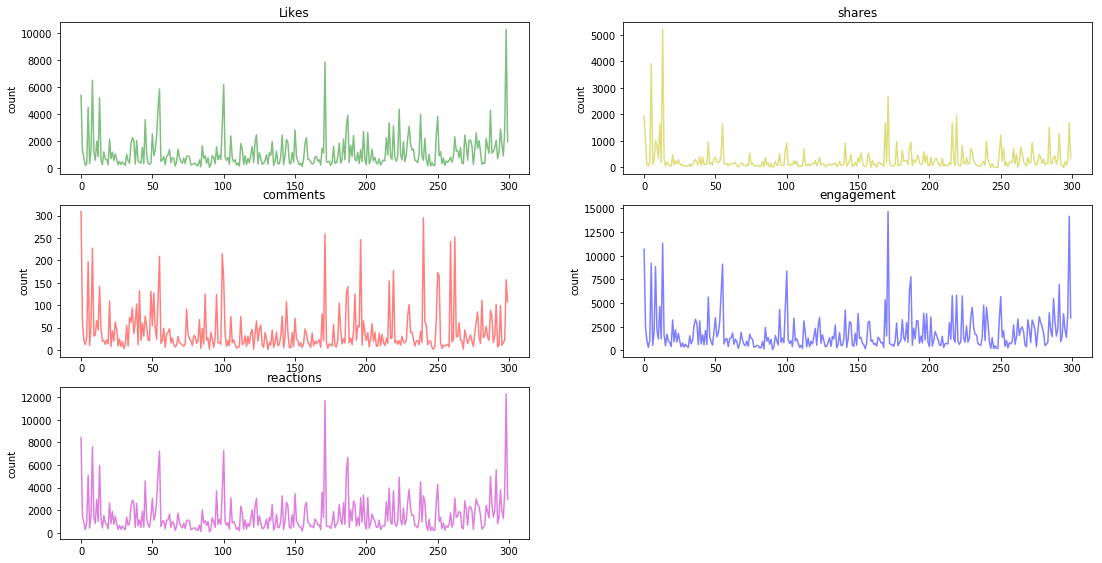

In [51]:
fig = plt.gcf()
fig.set_size_inches(18.5, 9.5)

plt.subplot(3,2,1)
plt.plot(post_data_2['likes_count_fb'],color='g',alpha=0.5)
plt.title('Likes')
plt.ylabel('count')

plt.subplot(3,2,2)
plt.plot(post_data_2['shares_count_fb'],color='y',alpha=0.5)
plt.title('shares')
plt.ylabel('count')

plt.subplot(3,2,3)
plt.plot(post_data_2['comments_count_fb'],color='r',alpha=0.5)
plt.title('comments')
plt.ylabel('count')

plt.subplot(3,2,4)
plt.plot(post_data_2['engagement_fb'],color='b',alpha=0.5)
plt.title('engagement')
plt.ylabel('count')

plt.subplot(3,2,5)
plt.plot(post_data_2['reactions_count_fb'],color='m',alpha=0.5)
plt.title('reactions')
plt.ylabel('count')

From this description and visualization, it is clear that the number of comments is the smallest among these metrics and is much smaller than any other metrics.
Visualization guide is found at https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-py

In [52]:
post_data_2[['positive_rea','negative_rea','rea_senti']].describe()

,positive_rea,negative_rea,rea_senti
count,300.000000,300.000000,300.000000
mean,190.196667,155.813333,34.383333
std,291.649555,437.849410,532.995607
min,5.000000,0.000000,-3357.000000
25%,37.750000,1.000000,-13.250000
50%,95.500000,4.000000,63.500000
75%,217.000000,95.000000,182.250000
max,3036.000000,3440.000000,3012.000000


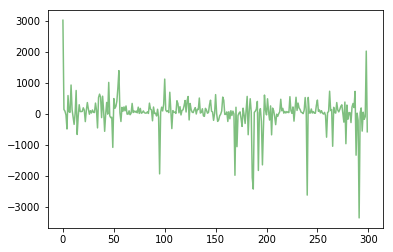

In [53]:
plt.plot(post_data_2['rea_senti'],color='g',alpha=0.5,label='likes')

In general sentiment of reaction is quite balanced. Though posts that generate extreme negative reaction is more than posts generating extreme positive reaction, positive reaction is still more popular among posts. 

post_data_2[['comment_sentiment']].describe()

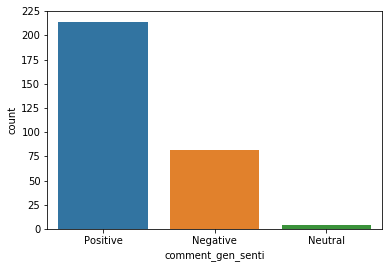

In [54]:
sns.countplot(x='comment_gen_senti', data=post_data_2)

Comment sentiment is more polarised than reaction sentiment, with positive sentiment being the most popular.


**Description and visualization of independent variables**

In [55]:
post_data_2['type'].value_counts()

link     191
video     56
photo     53
Name: type, dtype: int64

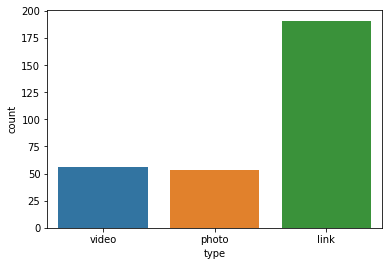

In [56]:
sns.countplot(x="type", data= post_data_2)

In [57]:
post_data_2['question'].value_counts()

0    253
1     47
Name: question, dtype: int64

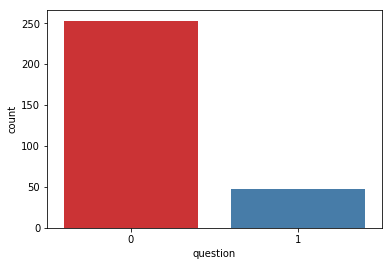

In [58]:
sns.countplot(x="question", data= post_data_2, palette="Set1")

In [59]:
post_data_2['call_in_action'].value_counts()

0    225
1     75
Name: call_in_action, dtype: int64

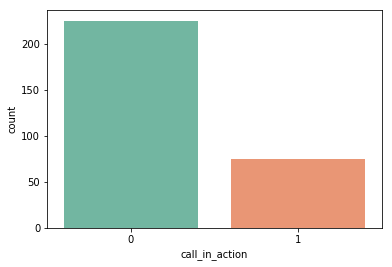

In [60]:
sns.countplot(x="call_in_action", data= post_data_2, palette="Set2")

In [61]:
post_data_2[['sentiment','word_count']].describe()

,sentiment,word_count
count,300.000000,300.000000
mean,-0.066667,39.066667
std,2.007233,34.498154
min,-4.000000,3.000000
25%,-2.000000,17.000000
50%,0.000000,24.000000
75%,2.000000,55.000000
max,4.000000,209.000000


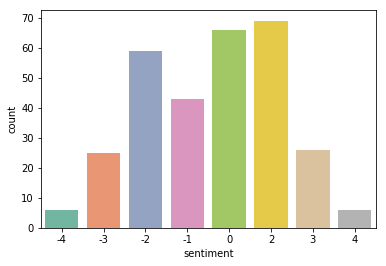

In [62]:
sns.countplot(x="sentiment", data= post_data_2, palette="Set2")

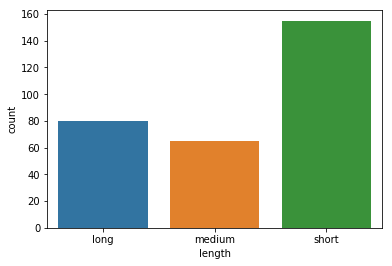

In [63]:
sns.countplot(x="length", data= post_data_2)

**Description and visualization of key relationships**

- Hypothesis 1: Different post types generate different engagement

In [64]:
post_data_2.groupby('type', as_index=False)['likes_count_fb','comments_count_fb',
                                          'reactions_count_fb','shares_count_fb','engagement_fb'].mean()

,type,likes_count_fb,comments_count_fb,reactions_count_fb,shares_count_fb,engagement_fb
0,link,988.319372,36.869110,1333.612565,209.078534,1579.560209
1,photo,1680.830189,51.358491,2033.113208,373.509434,2457.981132
2,video,1307.767857,54.607143,1650.857143,492.339286,2197.803571


The above description show that post of photo has the highest count of most variables except for number of comments, which video accounts for the highest number. Link is the type of post that has the lowest engagement metrics. 

Following is visualization of 5 primary dependent variables according to type of post. (codes for this visualization is found here https://python-graph-gallery.com/11-grouped-barplot/)

In [65]:
x=post_data_2.groupby('type', as_index=False)['likes_count_fb','comments_count_fb',
                                          'reactions_count_fb','shares_count_fb','engagement_fb'].mean()

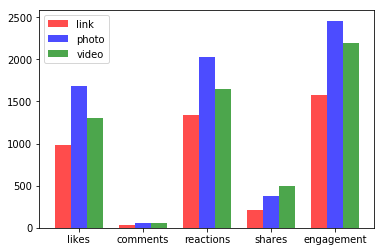

In [66]:
barWidth = 0.25
 
bars1 = x.iloc[0,1:]
bars2 = x.iloc[1,1:]
bars3 = x.iloc[2,1:]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='red', alpha=0.7, width=barWidth, label='link')
plt.bar(r2, bars2, color='blue', alpha=0.7,width=barWidth, label='photo')
plt.bar(r3, bars3, color='green', alpha=0.7,width=barWidth, label='video')
 
plt.xticks([r + barWidth for r in range(len(bars1))], ['likes', 'comments', 'reactions', 'shares','engagement'])
 
plt.legend()
plt.show()

- Hypothesis 2: Question inclusion increases engagement

In [67]:
post_data_2.groupby('question', as_index=False)['likes_count_fb','comments_count_fb',
                                          'reactions_count_fb','shares_count_fb','engagement_fb'].mean()

,question,likes_count_fb,comments_count_fb,reactions_count_fb,shares_count_fb,engagement_fb
0,0,1195.055336,41.920949,1546.150198,302.000000,1890.071146
1,1,1037.000000,47.148936,1356.319149,231.808511,1635.276596


As can be seen in this description, there is no apparent difference between two groups though content without question is slightly more engaging, which is against the hypothesis.
This is shown clearly in visualization (the visualization is conducted via "melting" of data frame guided here https://www.ibm.com/developerworks/community/blogs/jfp/entry/Tidy_Data_In_Python?lang=en)

In [68]:
x2=post_data_2.groupby('question', as_index=False)['likes_count_fb','comments_count_fb',
                                          'reactions_count_fb','shares_count_fb','engagement_fb'].mean()
x2 = x2.rename(columns={ 'likes_count_fb': 'likes','comments_count_fb':'comments','reactions_count_fb':'reactions',
                        'shares_count_fb':'shares','engagement_fb':'engagement'})

In [69]:
x2_melt = pd.melt(x2, 
               id_vars='question', 
               var_name='metrics', 
               value_name='means')

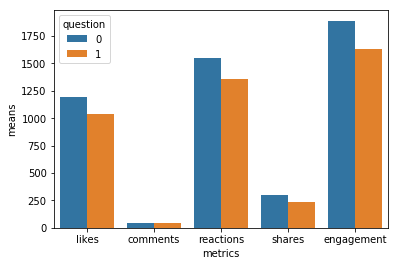

In [70]:
sns.barplot(x='metrics',y='means',hue='question',data=x2_melt)

- Hypothesis 3: Call-in-action content increases engagement.

In [71]:
post_data_2.groupby('call_in_action', as_index=False)['likes_count_fb','comments_count_fb',
                                          'reactions_count_fb','shares_count_fb','engagement_fb'].mean()

,call_in_action,likes_count_fb,comments_count_fb,reactions_count_fb,shares_count_fb,engagement_fb
0,0,1194.168889,42.151111,1532.311111,285.493333,1859.955556
1,1,1098.666667,44.506667,1468.706667,307.533333,1820.746667


Similar to Hypothesis 2, there is little difference between two groups in engagement and call-in-action content generate slightly less engagement.

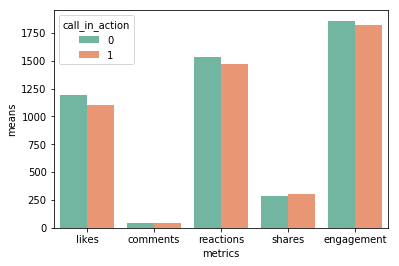

In [72]:
x3=post_data_2.groupby('call_in_action', as_index=False)['likes_count_fb','comments_count_fb',
                                          'reactions_count_fb','shares_count_fb','engagement_fb'].mean()
x3 = x3.rename(columns={ 'likes_count_fb': 'likes','comments_count_fb':'comments','reactions_count_fb':'reactions',
                        'shares_count_fb':'shares','engagement_fb':'engagement'})
x3_melt = pd.melt(x3, 
               id_vars='call_in_action', 
               var_name='metrics', 
               value_name='means')
sns.barplot(x='metrics',y='means',hue='call_in_action',data=x3_melt,palette='Set2')

- Hypothesis 4: Sentiment of post affects engagement quantitatively and qualitatively

In [73]:
post_data_2.groupby('sentiment', as_index=False)['likes_count_fb','comments_count_fb',
                                          'reactions_count_fb','shares_count_fb','engagement_fb'].mean()

,sentiment,likes_count_fb,comments_count_fb,reactions_count_fb,shares_count_fb,engagement_fb
0,-4,722.500000,35.000000,944.833333,207.666667,1187.500000
1,-3,776.360000,36.920000,1146.680000,283.560000,1467.160000
2,-2,908.406780,36.576271,1289.813559,228.610169,1555.000000
3,-1,1165.534884,53.069767,1498.697674,292.279070,1844.046512
4,0,982.696970,43.363636,1280.803030,322.363636,1646.530303
5,2,1336.492754,41.579710,1650.608696,285.304348,1977.492754
6,3,2090.538462,46.115385,2493.115385,339.384615,2878.615385
7,4,2033.333333,53.166667,2799.666667,520.666667,3373.500000


In [74]:
post_data_2.groupby('general_sentiment', as_index=False)['likes_count_fb','comments_count_fb',
                                          'reactions_count_fb','shares_count_fb','engagement_fb'].mean()

,general_sentiment,likes_count_fb,comments_count_fb,reactions_count_fb,shares_count_fb,engagement_fb
0,Negative,958.330827,41.902256,1314.879699,258.578947,1615.360902
1,Neutral,982.696970,43.363636,1280.803030,322.363636,1646.530303
2,Positive,1572.000000,43.435644,1935.752475,313.207921,2292.396040


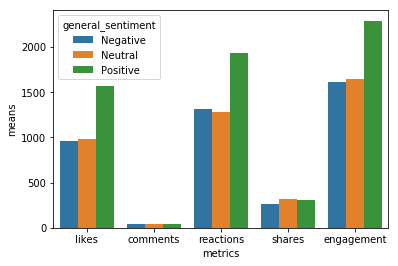

In [75]:
x4=post_data_2.groupby('general_sentiment', as_index=False)['likes_count_fb','comments_count_fb',
                                          'reactions_count_fb','shares_count_fb','engagement_fb'].mean()
x4 = x4.rename(columns={ 'likes_count_fb': 'likes','comments_count_fb':'comments','reactions_count_fb':'reactions',
                        'shares_count_fb':'shares','engagement_fb':'engagement'})
x4_melt = pd.melt(x4, 
               id_vars='general_sentiment', 
               var_name='metrics', 
               value_name='means')
sns.barplot(x='metrics',y='means',hue='general_sentiment',data=x4_melt)

In most cases (especially for likes, reactions, engagement), the the more positive the the post is, the more engagement it generates. However in more pro-active engagement like comments and shares, the difference is much smaller, as shown in visualization.

In [76]:
post_data_2.groupby('sentiment', as_index=False)['positive_rea','negative_rea','rea_senti'].mean()

,sentiment,positive_rea,negative_rea,rea_senti
0,-4,69.000000,153.333333,-84.333333
1,-3,76.400000,293.880000,-217.480000
2,-2,137.593220,243.711864,-106.118644
3,-1,227.046512,105.813953,121.232558
4,0,140.681818,157.348485,-16.666667
5,2,221.144928,92.884058,128.260870
6,3,392.230769,10.307692,381.923077
7,4,352.000000,414.333333,-62.333333


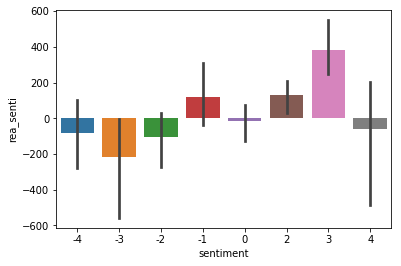

In [77]:
sns.barplot(x='sentiment',y='rea_senti',data=post_data_2)

As shown above, generally post sentiment positively affect reaction sentiment. However the effect does not seem to be consitent and linear.

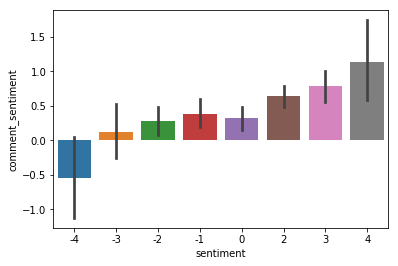

In [78]:
sns.barplot(x='sentiment',y='comment_sentiment',data=post_data_2)

As above visualizations show, sentiment of posts do have positive effect on sentiment of comment. Compared to reaction sentiment above, the effect on comment sentiment is more apparent.

In [79]:
pd.crosstab(post_data_2['general_sentiment'], post_data_2['reaction sentiment'])

reaction sentiment,Negative,Positive
general_sentiment,,
Negative,47,86
Neutral,23,43
Positive,10,91


In [80]:
pd.crosstab(post_data_2['general_sentiment'], post_data_2['comment_gen_senti'])

comment_gen_senti,Negative,Neutral,Positive
general_sentiment,,,
Negative,51,1,81
Neutral,21,1,44
Positive,10,2,89


The crosstabs above somehow present a correlation between sentiment of post and sentiment of comment. However in both cases it seems that while positive content normally generate positive reaction and comment, negative content even generate more positive comment and reaction than negative ones. 

- Hypothesis 5: Length of post affects engagement.

In [81]:
post_data_2.groupby('length', as_index=False)['likes_count_fb','comments_count_fb',
                                          'reactions_count_fb','shares_count_fb','engagement_fb'].mean()

,length,likes_count_fb,comments_count_fb,reactions_count_fb,shares_count_fb,engagement_fb
0,long,1237.075000,46.300000,1592.012500,310.150000,1948.462500
1,medium,1415.538462,49.061538,1919.753846,365.446154,2334.261538
2,short,1032.980645,38.251613,1308.245161,249.903226,1596.400000


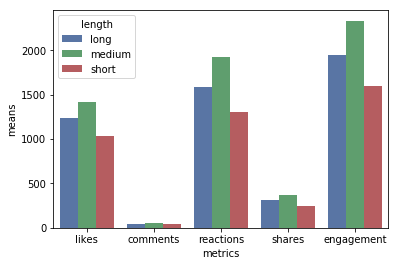

In [82]:
x5=post_data_2.groupby('length', as_index=False)['likes_count_fb','comments_count_fb',
                                          'reactions_count_fb','shares_count_fb','engagement_fb'].mean()
x5 = x5.rename(columns={ 'likes_count_fb': 'likes','comments_count_fb':'comments','reactions_count_fb':'reactions',
                        'shares_count_fb':'shares','engagement_fb':'engagement'})
x5_melt = pd.melt(x5, 
               id_vars='length', 
               var_name='metrics', 
               value_name='means')
sns.barplot(x='metrics',y='means',hue='length',data=x5_melt,palette='deep')

Generally long post generates slightly less engagement than short posts but posts of medium length get the most engagement. The relationship therefore does not seem to be clear.

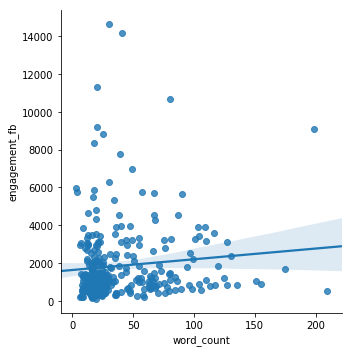

In [83]:
sns.lmplot(x='word_count',y='engagement_fb',data=post_data_2)

## 4. Hypotheses testing

To test the hypotheses, two types of tests are used: 

For Hypothesis 1 Tukey test is conducted to compare means of engagement metrics pair-wise. 

To test all hypotheses at once, OLS is utilised. 

In [84]:
import statsmodels
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

**Hypothesis 1 testing**

In order to do this, I will conduct Tukey test, which is a single-step multiple comparison procedure and statistical test to see if there is difference among groups of post type in engagement. The guide is found at http://hamelg.blogspot.nl/2015/11/python-for-data-analysis-part-16_23.html 

In [85]:
test1a = pairwise_tukeyhsd(endog=post_data_2['comments_count_fb'],
                          groups=post_data_2['type'],
                          alpha=0.05)
test1a.summary()

group1,group2,meandiff,lower,upper,reject
link,photo,14.4894,-4.173,33.1518,False
link,video,17.738,-0.5289,36.0049,False
photo,video,3.2487,-19.7874,26.2847,False


In [86]:
test1b = pairwise_tukeyhsd(endog=post_data_2['likes_count_fb'],
                          groups=post_data_2['type'],
                          alpha=0.05)
test1b.summary()

group1,group2,meandiff,lower,upper,reject
link,photo,692.5108,243.0773,1141.9444,True
link,video,319.4485,-120.4607,759.3576,False
photo,video,-373.0623,-927.8241,181.6994,False


In [87]:
test1c = pairwise_tukeyhsd(endog=post_data_2['engagement_fb'],
                          groups=post_data_2['type'],
                          alpha=0.05)
test1c.summary()

group1,group2,meandiff,lower,upper,reject
link,photo,878.4209,139.8641,1616.9778,True
link,video,618.2434,-104.662,1341.1487,False
photo,video,-260.1776,-1171.8209,651.4657,False


In [88]:
test1d = pairwise_tukeyhsd(endog=post_data_2['shares_count_fb'],
                          groups=post_data_2['type'],
                          alpha=0.05)
test1d.summary()

group1,group2,meandiff,lower,upper,reject
link,photo,164.4309,-16.108,344.9698,False
link,video,283.2608,106.5479,459.9736,True
photo,video,118.8299,-104.0197,341.6794,False


In [89]:
test1e = pairwise_tukeyhsd(endog=post_data_2['reactions_count_fb'],
                          groups=post_data_2['type'],
                          alpha=0.05)
test1e.summary()

group1,group2,meandiff,lower,upper,reject
link,photo,699.5006,111.4355,1287.5658,True
link,video,317.2446,-258.3583,892.8475,False
photo,video,-382.2561,-1108.1388,343.6267,False


In most of the cases, there is significant difference in engagement between link and photo with exception for number of shares and comments. For number of shares, only the difference between link and video is significant. For number of comments, there is no significant difference among groups.

**Regression with for independent variable**

OLS, a linear regression model, is conducted to test all hypotheses at the same time. Guidance for the test is found at https://stackoverflow.com/questions/19991445/run-an-ols-regression-with-pandas-data-frame

In [90]:
result = ols(formula='comments_count_fb ~ type+question+call_in_action+sentiment+word_count', data=post_data_2).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:      comments_count_fb   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.411
Date:                Fri, 30 Mar 2018   Prob (F-statistic):              0.210
Time:                        13:30:33   Log-Likelihood:                -1603.1
No. Observations:                 300   AIC:                             3220.
Df Residuals:                     293   BIC:                             3246.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         34.6821      4.869      7.

No independent variable has significant effect on number of comments, except for video-type.

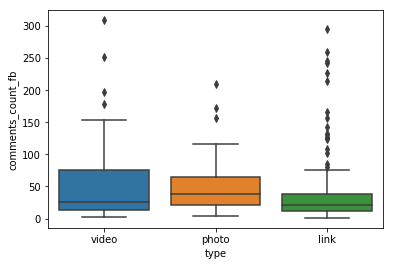

In [91]:
sns.boxplot(x="type", y="comments_count_fb", data=post_data_2)

In [92]:
test1= ols('shares_count_fb ~ type+question+call_in_action+sentiment+word_count', data=post_data_2).fit()
print(test1.summary())

                            OLS Regression Results                            
Dep. Variable:        shares_count_fb   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     2.944
Date:                Fri, 30 Mar 2018   Prob (F-statistic):            0.00835
Time:                        13:30:37   Log-Likelihood:                -2283.8
No. Observations:                 300   AIC:                             4582.
Df Residuals:                     293   BIC:                             4608.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        220.6395     47.082      4.

Only post type (photo and video) has significant effect on the number of shares.

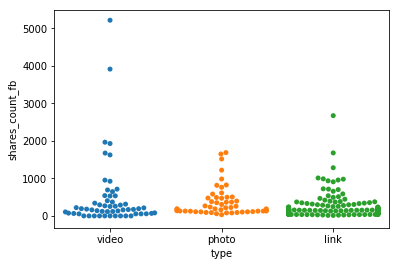

In [93]:
sns.swarmplot(x="type", y="shares_count_fb", data=post_data_2)

In [94]:
test2= ols('likes_count_fb ~ type+question+call_in_action+sentiment+word_count', data=post_data_2).fit()
print(test2.summary())

                            OLS Regression Results                            
Dep. Variable:         likes_count_fb   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     6.258
Date:                Fri, 30 Mar 2018   Prob (F-statistic):           3.34e-06
Time:                        13:30:55   Log-Likelihood:                -2547.2
No. Observations:                 300   AIC:                             5108.
Df Residuals:                     293   BIC:                             5134.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        977.2518    113.258      8.

Except for post type (video), only sentiment of post can effect number of likes

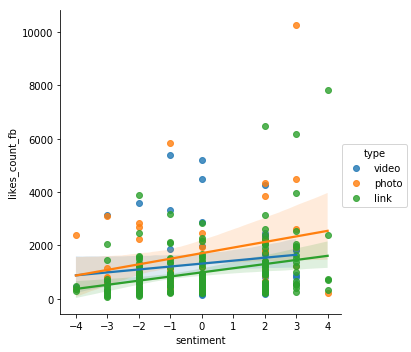

In [95]:
sns.lmplot(x="sentiment", y="likes_count_fb", hue='type',truncate=True, size=5, data=post_data_2)

In [96]:
test3= ols('reactions_count_fb ~ type+question+call_in_action+sentiment+word_count', data=post_data_2).fit()
print(test3.summary())

                            OLS Regression Results                            
Dep. Variable:     reactions_count_fb   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.892
Date:                Fri, 30 Mar 2018   Prob (F-statistic):           0.000934
Time:                        13:31:23   Log-Likelihood:                -2631.6
No. Observations:                 300   AIC:                             5277.
Df Residuals:                     293   BIC:                             5303.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1283.4891    150.086      8.

Againt, post type (video) and sentiment of post can affect number of reactions

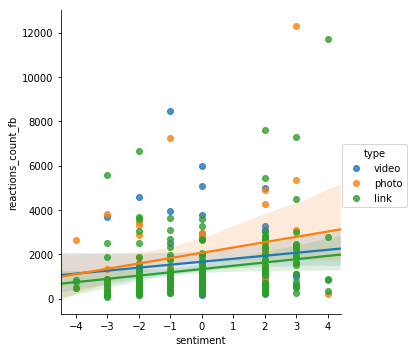

In [97]:
sns.lmplot(x="sentiment", y="reactions_count_fb", hue='type', data=post_data_2)

In [98]:
test4= ols('engagement_fb ~ type+question+call_in_action+sentiment+word_count', data=post_data_2).fit()
print(test4.summary())

                            OLS Regression Results                            
Dep. Variable:          engagement_fb   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     3.551
Date:                Fri, 30 Mar 2018   Prob (F-statistic):            0.00207
Time:                        13:31:51   Log-Likelihood:                -2701.7
No. Observations:                 300   AIC:                             5417.
Df Residuals:                     293   BIC:                             5443.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1538.8107    189.589      8.

Post type (photo) and sentiment have significant effect on engagement.

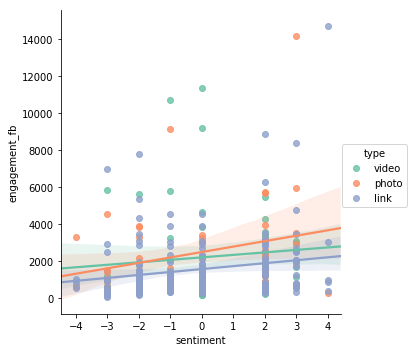

In [99]:
sns.lmplot(x="sentiment", y="engagement_fb", hue='type', data=post_data_2,palette='Set2')

In [100]:
test5= ols('comment_sentiment ~ type+question+call_in_action+sentiment+word_count', data=post_data_2).fit()
print(test5.summary())

                            OLS Regression Results                            
Dep. Variable:      comment_sentiment   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     6.630
Date:                Fri, 30 Mar 2018   Prob (F-statistic):           1.37e-06
Time:                        13:32:09   Log-Likelihood:                -329.08
No. Observations:                 300   AIC:                             672.2
Df Residuals:                     293   BIC:                             698.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3283      0.070      4.

Only post sentiment can significantly affect comment sentiment.

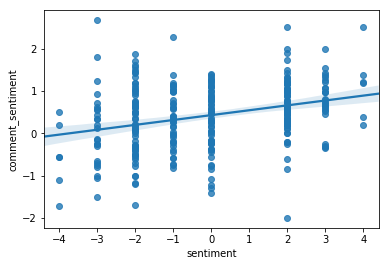

In [101]:
sns.regplot(x='sentiment',y='comment_sentiment',data=post_data_2)

In [102]:
test6= ols('rea_senti ~ type+question+call_in_action+sentiment+word_count', data=post_data_2).fit()
print(test6.summary())

                            OLS Regression Results                            
Dep. Variable:              rea_senti   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     9.015
Date:                Fri, 30 Mar 2018   Prob (F-statistic):           4.76e-09
Time:                        13:32:15   Log-Likelihood:                -2283.3
No. Observations:                 300   AIC:                             4581.
Df Residuals:                     293   BIC:                             4607.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -43.4929     47.001     -0.

sentiment of reaction is significantly correlated to post type (photo and video), call-in-action content and sentiment

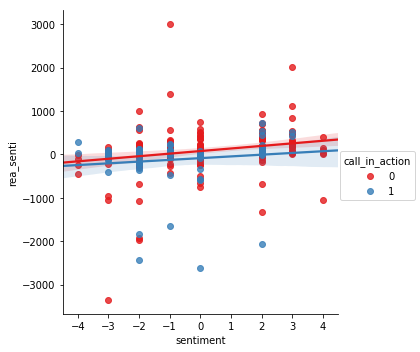

In [103]:
sns.lmplot(x="sentiment", y="rea_senti", hue='call_in_action', data=post_data_2, palette='Set1')

## 5. Summary of the findings and implications to the communication-related challenge

From above data analysis, two important results are obtained. Firstly, two factors that have the most significant effect on engagement are type and sentiment of posts. They have effects on most engagement measurement. For post type, photo is the most engaging type while video is the least. That visual factor is present in all type, no matter it is link or video might be the reason why the difference among post type groups is not strong. It is also noteworthy that sentiment of post has significant effect on sentiment of comment and reactions by audience. 

Secondly, no independent variable has significant effect on the number of comments. The result can be partly explained by the fact that the number of comments is much smaller than numbers of other engagement metrics. Considering comments as an active type of engagement, this poses the problem of finding factors that can affect comments.

Another finding is, against the hypotheses, question inclusion or call-in-action content seem to have negative effect on most engagement metrics, though not significantly.  

From this observation, consideration of post type and sentiment should be conducted for engagement promotion.

# II. Limitations of your analysis, and suggestions for further investigations

The analysis is not out of limitations. Firstly, like other quantitative analysis, this data analysis plan runs the risk of losing in-depth information through generalization of materials. Content-wise variables defined by simplified techniques cannot present all aspect of the content, which should be improved by a more thorough research plan including more human interaction. 

Besides, not every aspect of the issue is dealt with in this analysis. Factors such as publishing time or graphic characteristics may also have effect on engagement but were not studied. Similarly, the analysis only tests for linear relationship between independent variables and dependent variables, not non-linear one. Further analysis on other factors with other method of analysis are necessary to fully study Facebook engagement.

Lastly, it is easier to do descriptive analysis with Facebook data as in this analysis than finding reasons behind audience behaviours, therefore further examination should be paid to the exploration of motivation for engagement (Mahrt & Scharkow, 2013, p.23). 



# III. A discussion about ethical, privacy and normative considerations

The use of data from the Facebook page of World Wildlife Fund in this research does not pose an ethical problem as severe as privacy invasion because the organization uses data from its own social media account. Regarding analysis of engagement made by audience, it can be argued that as the activities studied are made on a public Facebook page rather than personal ones, they indeed exist in public area. Still, the ethical issue with this type of research is equivalent to that applies to public observation research, both lack informed consent from unknowing participants. However, as the researched is conducted unknowingly, this plan could study the absolute behaviours of social media users, examining what people really do rather than what they report doing (Rieder, 2013, p.347). This excludes experimental effects that may distort behaviour due to human interaction (Mahrt & Scharkow, 2013, p.24).

Finally, one normative issue to be concerned is that Facebook engagement does not represent real-life engagement and it is difficult to define the connection between the two. Speaking from the viewpoint that conservationist communication emphasises behavioural change, social media engagement that does not translate into reality is of little significance to NGO engagement.  


## References

Cho, M., Schweickart, T., & Haase, A. (2014). Public Engagement with Nonprofit Organizations on Facebook. Public Relations Review, 40, 565-567.

Dosemagen, S. (2016, January 28). Huffington Post. Retrieved from Social Media and Saving the Environment: Clicktivism or Real Change?: https://www.huffingtonpost.com/shannon-dosemagen-/social-media-and-saving-t_b_9100362.html 

Jackson, D. (2017, May 22). Know Your Limit: The Ideal Length of Every Social Media Post. Retrieved from Spout Social: https://sproutsocial.com/insights/social-media-character-counter/

Mahrt, M., & Scharkow, M. (2013). The Value of Big Data in Digital Media Research. Journal of Broadcasting and Electronic Media, 57(1), 20–33. https://doi.org/10.1080/08838151.2012.761700

Reinard, J. C. (2006). Chapter 2: Collecting Data on Variables. In J. C. Reinard, Communication Research Statistics (pp. 17-41). Sage.

Rieder, B. (2013). Studying Facebook via data extraction. Proceedings of the 5th Annual ACM Web Science Conference on - WebSci ’13, 346–355. https://doi.org/10.1145/2464464.2464475

Román Núñez, Y. C., & Cuesta Moreno, O. J. (2016). Communication and environmental conservation: Advances and challenges in Latin America. Revista Latina de Comunicacion Social, 71, 15–39. https://doi.org/10.4185/RLCS-2016-1082en

Schwartz, C. (2017). 2017 Social Media Industry Benchmark Report. Retrieved from https://www.rivaliq.com/blog/2017-social-media-industry-benchmark-report/

